# Imports

In [3]:
# Data tools
import pandas as pd
import numpy as np
# Graph Tools
import matplotlib.pyplot as plt
import seaborn as sns
# File tools
from joblib import dump, load
# Sstatistics and machine learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

## Importing data and preparing it for ML


In [4]:
# Import cleaned data
df = pd.read_csv("data_air/AB_data_clean.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,neighbourhood_other,neighbourhood_other_label,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,Other,29,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,Midtown,25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# Manage Na values in dataframe
df.isna().sum()

id                                      0
name                                   15
host_id                                 0
host_name                              21
neighbourhood_group                     0
neighbourhood                           0
latitude                                0
longitude                               0
room_type                               0
price                                   0
minimum_nights                          0
number_of_reviews                       0
last_review                          9913
reviews_per_month                    9913
calculated_host_listings_count          0
availability_365                        0
neighbourhood_other                     0
neighbourhood_other_label               0
neighbourhood_group_Bronx               0
neighbourhood_group_Brooklyn            0
neighbourhood_group_Manhattan           0
neighbourhood_group_Queens              0
neighbourhood_group_Staten Island       0
room_type_Entire home/apt         

In [6]:
print(df[df['last_review'].isna()].groupby('number_of_reviews').size())
print(df[df['reviews_per_month'].isna()].groupby('number_of_reviews').size())

number_of_reviews
0    9913
dtype: int64
number_of_reviews
0    9913
dtype: int64


In [7]:
df['last_review'] = df['last_review'].fillna(0)#As SciKit does not handle colums with Nan values we replace them with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [8]:
# df[df.isna().any(axis=1)].head()
# df=df.dropna()#drop remaining 37 Nan values, 16 from name and 21 from host name 

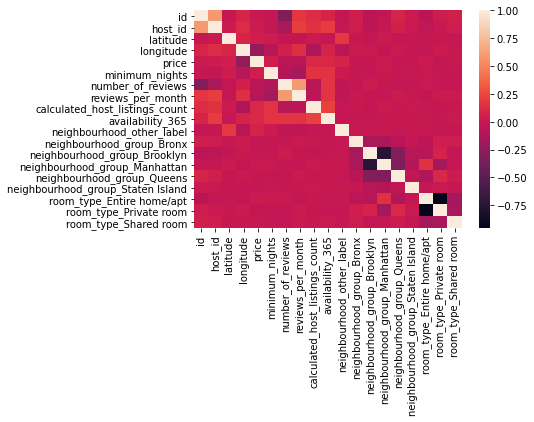

In [9]:
# Correlation matrix giving an overview of how our colums relate to one another
sns.heatmap(df.corr())
plt.show()

### Making datasets for the machine learning algorithm
Here we choose what features we will be using to predict the price of a condo. 
Features are dropped either because we have recoded the varriable such as room_type and thus uses it diffrently. or because it is irrelevant to price, such as the id of the listing or the name of the Airbnb host.

In [10]:
# Display the possible features of the dataframe
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other', 'neighbourhood_other_label',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [11]:
# Choose which features not to include in the calculation estimating price.
features = df.drop(['price',
                    'id', 
                    'name', 
                    'host_id', 
                    'host_name', 
                    'neighbourhood_group',
                    'neighbourhood', 
                    'room_type',
                    'last_review',
                    'neighbourhood_other'], axis=1)
target = df.price
# Print the chosen features
print(features.columns)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other_label',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


## Baseline model linear regression
Here we use linear regression to draw the best possible line throug the dataset, giving us a baseline predection to compare further analysis with.

In [12]:
scaler = StandardScaler()
base_features = scaler.fit_transform(features)

# To do regression we first need to make a sample of our data to make the regression analysis on, and the a seperate chunk of data to test that analysis on.
test_fraction = 0.2 # We chose to keep 20% of the dataset seperate to test the regression we make


# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(base_features, target, test_size = test_fraction, random_state=3546)
# Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 16) 	Testing Features Shape:	 (9743, 16)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [13]:
# Make a prediction of price via linear regression
reg_lin = LinearRegression().fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)
print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 79.4866


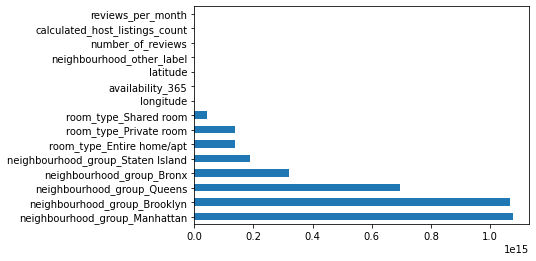

In [14]:
# Show the features most important in making the prediction above 
pd.Series(np.abs(reg_lin.coef_), index=features.columns).nlargest(15).plot(kind='barh')
plt.show()

## Linear regression conclusion
By finding the mean error of a linear regression we now have a baseline model of approximately 79 to beat, the smaller this number the better.
This number means that even a almost perfect line(the regression line) corrrelating price with our chosen features, will have a mean error or distance to the actually price of around 79 dollars.

## Decision Tree
In this section we try to improve upon the simple linear regression by selecting relevant data to make the regression via a decision tree.

In [45]:
# Just like with the linear regression above we set aside 20% of the dataset for testing.
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = test_fraction, random_state=3546)
# Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 16) 	Testing Features Shape:	 (9743, 16)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [46]:
parameters = {'criterion':('mse', 'poisson'), 'max_depth':[1, 5, 10, 15, 20]} #'friedman_mse' gives same results as mse, mae is 60 times slower then mse and poisson

reg_tree = DecisionTreeRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_tree, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=3546),
             param_grid={'criterion': ('mse', 'poisson'),
                         'max_depth': [1, 5, 10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [47]:
df_reg_tree = pd.DataFrame(reg_seach.cv_results_).sort_values('rank_test_score')
df_reg_tree.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.344136,0.031923,0.009351,0.001209,mse,10,"{'criterion': 'mse', 'max_depth': 10}",-70.131751,-71.948972,-73.823899,-71.713050,-71.073480,-71.73823,1.218009,1
1,0.180028,0.005640,0.007295,0.001075,mse,5,"{'criterion': 'mse', 'max_depth': 5}",-71.746204,-72.710705,-72.873362,-71.709156,-71.227623,-72.05341,0.632324,2


In [48]:
reg_tree_best = reg_seach.best_estimator_
y_pred = reg_tree_best.predict(X_test)

print(f'Decision tree has {reg_tree_best.tree_.node_count} nodes with maximum depth {reg_tree_best.tree_.max_depth}.')
print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Decision tree has 1133 nodes with maximum depth 10.
Mean absolute error (on test data): 71.0034


In [49]:
# Display tree
#fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(25,20), dpi=500)
#tree.plot_tree(reg_tree_best, feature_names=features.columns, filled = True)
#fig.savefig('imagename.jpeg')

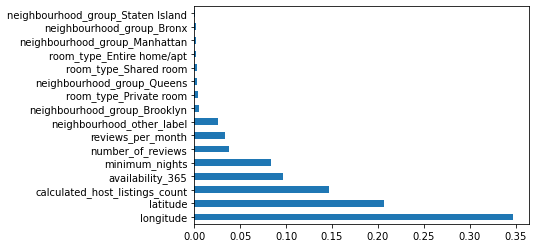

In [50]:
# Again we see the features of the regression displayd by relevans
pd.Series(reg_tree_best.feature_importances_, index=features.columns).nlargest(20).plot(kind='barh')
plt.show()

## Decision tree conclusion
By using a decision tree we have been able to cut the Mean Absolute Error from approximately 79 down to 71 by dividing the dataset into 1133 smaller nodes before doing the regression.
This is not bad, but we will try to improve upon it further in the next section where we turn our decision trre into an entire forest

## Random Forest
To enhance our prediction we use the Random Forest technique which combines several decisions trees like the one above to make many a single prediction.

In [15]:
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = test_fraction, random_state=3546)
# Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 16) 	Testing Features Shape:	 (9743, 16)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [16]:
# This is where the random forest differs from simple decision tree. We ensemble up to 200 trees to find the best tree to continue with.
parameters = {'n_estimators':[10, 50, 100, 150, 200], 'criterion':('mse',), 'max_depth':[10, 20, None]} # mae is again more than 60 times slower than mse

reg_forest = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=3546),
             param_grid={'criterion': ('mse',), 'max_depth': [10, 20, None],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [17]:
# Cross validate and sort by highest score 
df_reg_forest = pd.DataFrame(reg_seach.cv_results_).sort_values('rank_test_score')
df_reg_forest.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,38.658959,2.541454,0.345985,0.059571,mse,10,200,"{'criterion': 'mse', 'max_depth': 10, 'n_estim...",-66.869343,-67.612613,-68.225995,-66.970215,-67.024029,-67.340439,0.513303,1
3,31.243877,2.100210,0.261325,0.032496,mse,10,150,"{'criterion': 'mse', 'max_depth': 10, 'n_estim...",-66.861770,-67.626377,-68.225444,-67.027251,-67.097402,-67.367649,0.499514,2


In [18]:
reg_forest_best = reg_seach.best_estimator_
y_pred = reg_forest_best.predict(X_test)

print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 68.6235


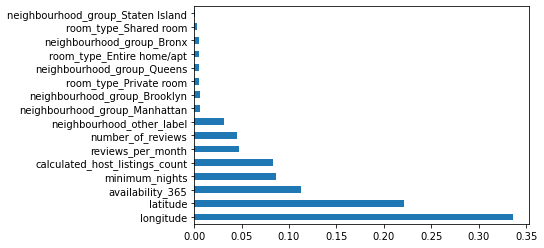

In [19]:
pd.Series(reg_forest_best.feature_importances_, index=features.columns).nlargest(20).plot(kind='barh')
plt.show()

## Random Forest conclusion
By using a Random Forest we have been able to cut the Mean Absolute Error from down just a bit further to around 68,5. This jump is a good bit smaller then the previous one, we are however not quite done with the random forest method.
Below we attempt to improve upon our random forrest model prediction, by doing feature selection, aka removing features that are unimportant to the regression.

## Random Forest with feature selection

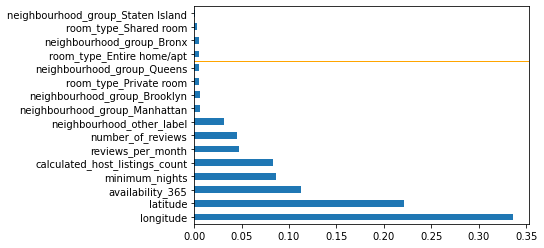

In [56]:
# Here we display featues of our random forest and the threshold for when we consider a feature unimportant
df_reg_forest_feat_im = pd.Series(reg_forest_best.feature_importances_, index=features.columns).nlargest(20)
# Threshold of (un)importance
threshold_feat_im = 0.005


threshold_plot = len(df_reg_forest_feat_im[df_reg_forest_feat_im>=threshold_feat_im])-0.5

df_reg_forest_feat_im.plot(kind='barh')
plt.axhline(y=threshold_plot,linewidth=1, color='orange')
plt.show()

In [57]:
# Choose which featues not to include in the calculation
features_select = features.drop(df_reg_forest_feat_im[df_reg_forest_feat_im<threshold_feat_im].index, axis=1)
target = df.price

print(features_select.columns)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_other_label',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'room_type_Private room'],
      dtype='object')


In [58]:
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features_select, target, test_size = test_fraction, random_state=3546)
# Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 12) 	Testing Features Shape:	 (9743, 12)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [61]:
parameters = {'n_estimators':[10, 50, 100, 150, 200], 'criterion':('mse',), 'max_depth':[10, 20, None]} # mae is again more than 60 times slower than mse

reg_forest_select = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest_select, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=3546),
             param_grid={'criterion': ('mse',), 'max_depth': [10, 20, None],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [62]:
df_reg_forest_select = pd.DataFrame(reg_seach.cv_results_).sort_values('rank_test_score')
df_reg_forest_select.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,25.402642,0.300159,0.251938,0.003771,mse,10,200,"{'criterion': 'mse', 'max_depth': 10, 'n_estim...",-66.864296,-67.513734,-68.240765,-66.962594,-66.921412,-67.300560,0.524925,1
2,13.399523,0.853090,0.139017,0.023172,mse,10,100,"{'criterion': 'mse', 'max_depth': 10, 'n_estim...",-66.875706,-67.555974,-68.244212,-67.047758,-66.856761,-67.316082,0.528371,2


In [63]:
reg_forest_select_best = reg_seach.best_estimator_
y_pred = reg_forest_select_best.predict(X_test)

print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 68.5127


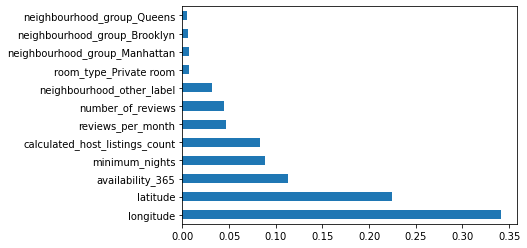

In [64]:
pd.Series(reg_forest_select_best.feature_importances_, index=features_select.columns).nlargest(20).plot(kind='barh')
plt.show()

## Random Forest with feature selection Conclusion
As can be seen feature selection did not do a lot of diffrence to the random forest model our mean absolute error went from 68,6 to 68,5, which in this case is largely irrelvant.


## Random forest for the website
Here we genereate the random forest used on the websites page 9, to suggest prices for Airbnb condos.
As we saw above that neighborhood groups are largely irrelevant as the feature importance is subsumed by the latitude and longtitude feature, these are all dropped for the website predictor.

In [1]:
# Removeing irrelevant features
features_web = features.drop(['reviews_per_month',
                              'neighbourhood_other_label',
                              'neighbourhood_group_Bronx',
                              'neighbourhood_group_Brooklyn',
                              'neighbourhood_group_Manhattan', 
                              'neighbourhood_group_Queens',
                              'neighbourhood_group_Staten Island'], axis=1)
target = df.price

print(features_web.columns)

NameError: name 'features' is not defined

In [66]:
test_fraction = 0.2

# This is a stratified split:
X_train, X_test, y_train, y_test = train_test_split(features_web, target, test_size = test_fraction, random_state=3546)
# Display how many samples are chosen for training and test, respectively
print('Training Features Shape:', X_train.shape,'\tTesting Features Shape:\t', X_test.shape)
print('Training Labels Shape:\t', y_train.shape, '\tTesting Labels Shape:\t', y_test.shape)

Training Features Shape: (38970, 9) 	Testing Features Shape:	 (9743, 9)
Training Labels Shape:	 (38970,) 	Testing Labels Shape:	 (9743,)


In [67]:
parameters = {'n_estimators':[10, 50, 100, 150, 200], 'criterion':('mse',), 'max_depth':[10, 20, None]} # mae is again more than 60 times slower than mse

reg_forest_web = RandomForestRegressor(random_state=3546) # random state is set so as to guarantee the same outcome every time
reg_seach = GridSearchCV(reg_forest_web, parameters, scoring='neg_mean_absolute_error', refit=True, )#verbose=4)

reg_seach.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=3546),
             param_grid={'criterion': ('mse',), 'max_depth': [10, 20, None],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [68]:
df_reg_forest_web = pd.DataFrame(reg_seach.cv_results_).sort_values('rank_test_score')
df_reg_forest_web.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,17.098092,1.426560,0.198983,0.019181,mse,10,150,"{'criterion': 'mse', 'max_depth': 10, 'n_estim...",-67.058696,-67.740407,-68.501693,-67.115527,-66.988532,-67.480971,0.576809,1
4,23.541994,1.949108,0.301652,0.024079,mse,10,200,"{'criterion': 'mse', 'max_depth': 10, 'n_estim...",-67.054049,-67.755101,-68.531991,-67.108138,-66.959011,-67.481658,0.595566,2


In [69]:
reg_forest_web_best = reg_seach.best_estimator_
y_pred = reg_forest_web_best.predict(X_test)

print(f'Mean absolute error (on test data): {round(mean_absolute_error(y_test, y_pred),4)}')

Mean absolute error (on test data): 68.7354


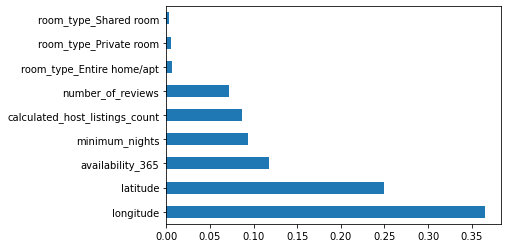

In [70]:
# Show features sorted by importance
pd.Series(reg_forest_web_best.feature_importances_, index=features_web.columns).nlargest(20).plot(kind='barh')
plt.show()

## Random Forest for website-conclusion
Our final random forest model, usable on the website shows a Mean Absolute Error of 68.7, while being pruned of features, making user interaction much easier.
This is an improvemnt in proformace over det linear regression model which had a Mean Absolute Error of 79, giving ours a 14% improvement over the competing model.

In [71]:
# Save our model in a format that is usable on the website
dump(reg_forest_web, 'model_forest_web.joblib')

['model_forest_web.joblib']